# Introduction

In this project, I will analyze a dataset that contains information about students and their performances. My goal is to identify patterns and trends within the data that may help us understand what factors contribute to student success. By examining clusters in this dataset, I hope to uncover insights into the characteristics that distinguish high-performing students from their peers.

# Main Questions

- what clusters are there in this dataset 
- what factor most effect a student 
- what factor would most improve a student grades

# Dataset: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
table = pd.read_csv(r"C:\Users\jesss\OneDrive\Documents\GitHub\ITCS3162\datasets\student_dropout_behavior_dataset.csv")

# Introduce the Data: 

student_id: the student indivual id number 

name: the name of the student 

Age: the age of the student

Gender: the gender of the student 

quiz1_mark: on a scale from 1-10 what the sudent got on the exam 

quiz2_mark: on a scale from 1-10 what the sudent got on the exam 

quiz3_mark: on a scale from 1-10 what the sudent got on the exam 

total_assingment: the amount of assignments the student has assigned 

assingment_submitted: the amount of assignments the student has subbmitted 

midterm_marks: the score the  student has recived on their midterm 

final_marks: the score the  student has recived on their final

previous_gpa: the GPA the student had previously 

total_lectures: the amount of lecture the student has assinged 

lecture_attendance: the amount of lecture the student has attended

total_lab_sessions: the amount of labs the student has assigned 

labs_attended: the amount of labs the student has attended

After pre-porcesing data: 

attendace_rate: the rate at which the student attended their lectures (lecture_attendace / total_lectures)

lab_participation: the amount the student participate in their labs (total_lab_sessions / labs_attended)

In [5]:
table.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


# Pre-processing the Data

When pre-processing my data what I did was first drop colunms that are not useful to the main questions like student_id and name. The I dropped any columns with missing values to not corrupt my data. After that I encoded the gender row to have male = 1, and female = 0 to make it easier to work with. Then I created some new features to better analyis the data so I created a attendace rate and lab participation. lastly I standardize numeric features for clustering I will be doing later in the project. 

In [14]:
table = table.drop(["student_id", "name", "assignments_submitted"], axis=1, errors="ignore")

GenderEncoder = LabelEncoder()
table["gender"] = GenderEncoder.fit_transform(table["gender"]) 
table["attendance_rate"] = table["lectures_attended"] / table["total_lectures"]
table["lab_participation"] = table["labs_attended"] / table["total_lab_sessions"]

# thinking about droping totals now that we have rates???
# table = table.drop(["total_lectures", "lectures_attended", "total_lab_sessions", "labs_attended"], axis=1)

scaler = StandardScaler()
scaled_table = pd.DataFrame(scaler.fit_transform(table), columns=table.columns)


In [15]:
table.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,attendance_rate,lab_participation
0,19,1,8.0,5.7,7.4,5,30.0,36.5,2.57,12,4,6,1,0.333333,0.166667
1,21,1,10.0,7.9,4.1,5,25.4,33.0,2.40,12,1,6,5,0.083333,0.833333
2,19,0,7.5,1.2,0.3,5,14.4,24.8,2.99,12,0,6,0,0.000000,0.000000
3,21,1,5.2,2.5,9.9,5,17.7,41.0,1.68,12,9,6,0,0.750000,0.000000
4,21,0,5.9,6.3,2.0,5,23.8,31.0,2.53,12,7,6,4,0.583333,0.666667


# Data understanding / Visualization

In [16]:
table.describe()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,attendance_rate,lab_participation
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000,300.000000,300.000000
mean,21.550000,0.483333,7.254667,5.866667,5.469000,5.0,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000,0.501111,0.518333
std,2.241483,0.500557,1.611791,2.414786,2.711083,0.0,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676,0.310534,0.330446
min,18.000000,0.000000,2.800000,0.000000,0.000000,5.0,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000,0.000000,0.000000
25%,20.000000,0.000000,6.075000,4.000000,3.600000,5.0,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000,0.250000,0.166667
50%,22.000000,0.000000,7.300000,5.800000,5.600000,5.0,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000,0.500000,0.500000
75%,23.000000,1.000000,8.400000,7.700000,7.200000,5.0,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000,0.750000,0.833333
max,25.000000,1.000000,10.000000,10.000000,10.000000,5.0,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000,1.000000,1.000000


From going more into the dataset and describing it we can see for details like the mean and min the better understand the dataset. 

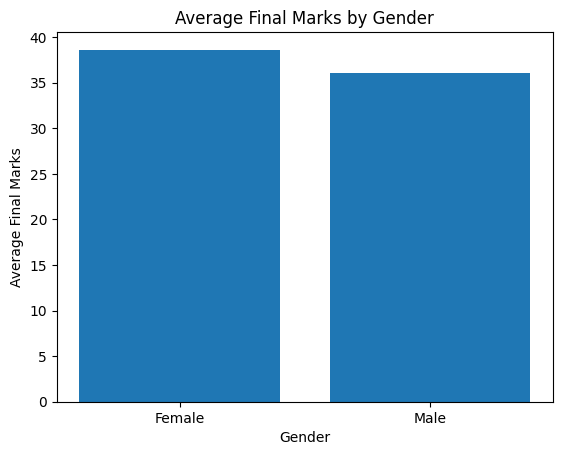

In [17]:
avg_by_gender = table.groupby("gender")["final_marks"].mean()

plt.bar(["Female", "Male"], avg_by_gender)
plt.title("Average Final Marks by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Final Marks")
plt.show()


with this visualization we can better understand the gender row more and see the affects gneder has on a student. 

# Modeling 

# K-means clustering 

In [ ]:
code goes hereee

I chose the use the K-means clustering tt’s a simple and efficient algorithm for finding distinct groups in numeric data. Which is perfect for my dataset and the main questions I am trying the answer in this project 

# Agglomerative Clustering

In [ ]:
code goes here

I chose Agglomerative Clustering for my second type of clustering model because it works well with K-means clustering and confirm whether the same group patterns appear when using a hierarchical approach. 

# Storytelling

telling the story of my project

# Impact Section

telling the impcat of my project 